<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Rdkit_cheminformatics_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install rdkit-pypi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 58.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import warnings

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem, PandasTools, MACCSkeys, AtomPairs, rdFingerprintGenerator
from rdkit import DataStructs
from rdkit.Chem.rdmolops import PatternFingerprint
from rdkit.Avalon import pyAvalonTools
from rdkit.Chem.AtomPairs.Pairs import GetAtomPairFingerprintAsBitVect

Failed to find the pandas get_adjustment() function to patch
Failed to patch pandas - PandasTools will have limited functionality


In [41]:
mol = Chem.MolFromSmiles("c1ccccc1")

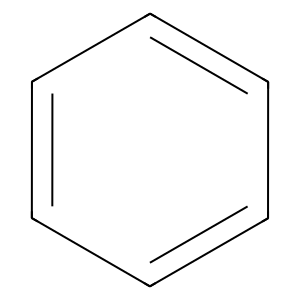

In [42]:
mol

In [43]:
glvc = Chem.MolFromSmiles("Cc1ccc(cc1Nc2nccc(n2)c3cccnc3)NC(=O)c4ccc(cc4)CN5CCN(CC5)C")

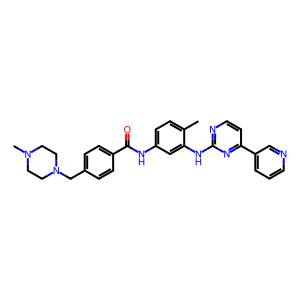

In [44]:
glvc

In [3]:
import pandas as pd

smiles_list = [
    'CC(=O)OC1=CC=CC=C1',  # Aspirin-like structure
    'C1=CC=C(C=C1)CCN',    # Phenethylamine structure
    'CC1=CC=C(C=C1)O',     # p-Cresol
    'C1=CC=C(C(=C1)O)O',   # Hydroquinone
    'CC(=O)CCCN',          # 5-Aminopentan-2-one
    'COC1=CC=CC=C1CC=O',   # 2-(2-methoxyphenyl)acetaldehyde
    'CC1=CC=CC=C1N',       # o-Toluidine
    'C1=CC=C(C=C1)C(=O)O', # Benzoic acid
    'CCOC(=O)CC'           # Ethyl propionate
]

df = pd.DataFrame(smiles_list, columns=['smiles'])

In [4]:
df

,smiles
0,CC(=O)OC1=CC=CC=C1
1,C1=CC=C(C=C1)CCN
2,CC1=CC=C(C=C1)O
3,C1=CC=C(C(=C1)O)O
4,CC(=O)CCCN
5,COC1=CC=CC=C1CC=O
6,CC1=CC=CC=C1N
7,C1=CC=C(C=C1)C(=O)O
8,CCOC(=O)CC


In [5]:
PandasTools.AddMoleculeColumnToFrame(df,'smiles','mol')

Failed to patch pandas - unable to change molecule rendering


In [6]:
df

,smiles,mol
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9f50>
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9fc0>
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca030>
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca0a0>
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca110>
5,COC1=CC=CC=C1CC=O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca180>
6,CC1=CC=CC=C1N,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca1f0>
7,C1=CC=C(C=C1)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca260>
8,CCOC(=O)CC,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca2d0>


In [7]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit import Chem

IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize = 300, 300
rdDepictor.SetPreferCoordGen(True)

In [8]:
examples = """C(C)(C)O isopropanol
C(Cl)(Cl)(Cl)Cl carbon tetrachloride
CC(=O)O acetic acid"""
smiles_list = [x.split(" ",1) for x in examples.split("\n")]

In [9]:
smiles_list = df['smiles'].tolist()

In [10]:
smiles_list

['CC(=O)OC1=CC=CC=C1',
 'C1=CC=C(C=C1)CCN',
 'CC1=CC=C(C=C1)O',
 'C1=CC=C(C(=C1)O)O',
 'CC(=O)CCCN',
 'COC1=CC=CC=C1CC=O',
 'CC1=CC=CC=C1N',
 'C1=CC=C(C=C1)C(=O)O',
 'CCOC(=O)CC']

In [11]:
from rdkit.Chem.Draw import MolsToGridImage

def display_structures(smiles_list):
    mol_list = []
    for smiles in smiles_list:
        mol_list.append(Chem.MolFromSmiles(smiles))
    return MolsToGridImage(mol_list,molsPerRow=5)

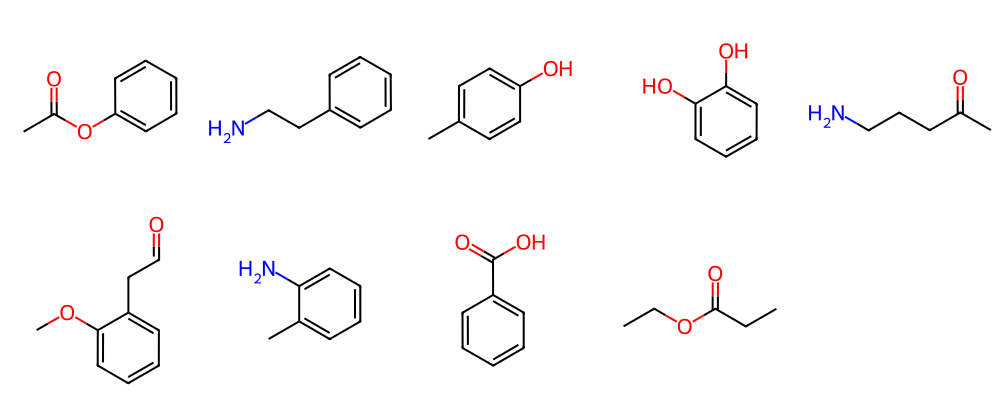

In [12]:
display_structures(smiles_list)

#Fingerprinting and Molecular Similarity

In [13]:
df_maccs = []
for mol in df['mol']:
  maccs_bitvector = MACCSkeys.GenMACCSKeys(mol)  # generate bitvector object
  arr = np.zeros((0,), dtype=np.int8)
  DataStructs.ConvertToNumpyArray(maccs_bitvector,arr) # convert the RDKit explicit vectors into numpy arrays

  df_maccs.append(arr)
MACCS = pd.concat([df, pd.DataFrame(df_maccs)], axis=1)

In [14]:
MACCS.head()

,smiles,mol,0,1,2,3,4,5,6,7,...,157,158,159,160,161,162,163,164,165,166
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9f50>,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9fc0>,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca030>,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,1,0
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca0a0>,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,1,1,1,0
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca110>,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


In [15]:
from rdkit import DataStructs

##Morgan Fingerprint


In [16]:
df_mf = []
for mol in df['mol']:
  mf_bitvector = AllChem.GetMorganFingerprintAsBitVect(mol, radius=1, nBits = 1024)
  arr = np.zeros((0,), dtype=np.int8)
  # convert the RDKit explicit vectors into numpy arrays
  DataStructs.ConvertToNumpyArray(mf_bitvector,arr)
  df_mf.append(arr)

MF = pd.concat([df, pd.DataFrame(df_mf)], axis=1)

In [17]:
MF.head()

,smiles,mol,0,1,2,3,4,5,6,7,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9f50>,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9fc0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca030>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca0a0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca110>,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


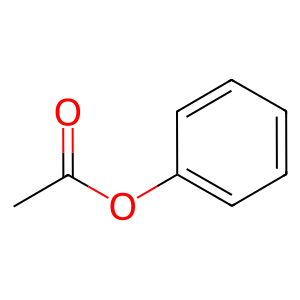

Number of ones: 13
Number of zeros: 1011


In [18]:
display(MF.iloc[0,1])
molecule = MF.iloc[0,2:]
num_ones = np.sum(molecule)
num_zeros = len(molecule) - num_ones
print("Number of ones:", num_ones)
print("Number of zeros:", num_zeros)

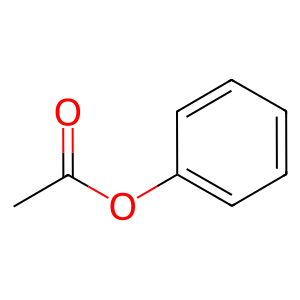

No of ones:  13
No of zeros:  1011 

11      1
33      1
64      1
322     1
356     1
650     1
695     1
705     1
726     1
807     1
849     1
893     1
1017    1
Name: 0, dtype: object


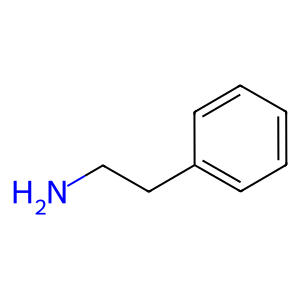

No of ones:  10
No of zeros:  1014 

64     1
80     1
147    1
219    1
356    1
726    1
730    1
816    1
849    1
981    1
Name: 1, dtype: object


In [19]:
# print first molecule in the dataset
display(MF.iloc[0,1])
nmpyrrole = MF.iloc[0,2:]

print(f'No of ones:  {nmpyrrole[nmpyrrole==1].count()}')
print(f'No of zeros:  {nmpyrrole[nmpyrrole==0].count()} \n')

print(nmpyrrole[nmpyrrole==1])

# print second molecule in the dataset
display(MF.iloc[1,1])
pyrrole = MF.iloc[1,2:]

print(f'No of ones:  {nmpyrrole[pyrrole==1].count()}')
print(f'No of zeros:  {nmpyrrole[pyrrole==0].count()} \n')

print(pyrrole[pyrrole==1])


##Atom Pair Fingerprint


In [20]:
# create an empty list
df_apf = []

# run a for loop to iterate through each molecule
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=4096)

for mol in df['mol']:
  apf_bitvector = apgen.GetFingerprint(mol)


# convert the RDKit explicit vectors into numpy arrays
  arr = np.array(apf_bitvector)
  df_apf.append(arr)

APF = pd.concat([df, pd.DataFrame(df_apf)], axis=1)



##Topological Torsion Fingerprint


In [21]:
df_ttf = []
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)
for mol in df['mol']:
  ttf_bitvector = ttgen.GetFingerprint(mol)

  # convert the RDKit explicit vectors into numpy arrays
  arr = np.array(ttf_bitvector)
  df_ttf.append(arr)

TTF = pd.concat([df, pd.DataFrame(df_ttf)], axis=1)

In [22]:
TTF.head()

,smiles,mol,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,CC(=O)OC1=CC=CC=C1,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9f50>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,C1=CC=C(C=C1)CCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fc9fc0>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CC1=CC=C(C=C1)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca030>,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,C1=CC=C(C(=C1)O)O,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca0a0>,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CC(=O)CCCN,<rdkit.Chem.rdchem.Mol object at 0x7fa8c8fca110>,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


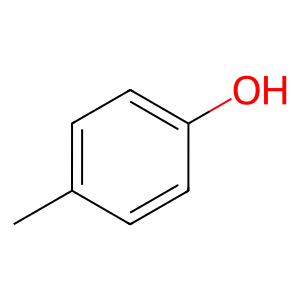

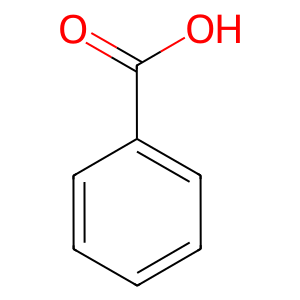

In [23]:
display(MF.iloc[2,1])
display(MF.iloc[7,1])

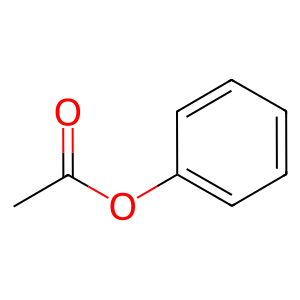

In [29]:
first_mol_obj  = MF.iloc[0, 1]
second_mol_obj = MF.iloc[3, 1]
first_mol_obj

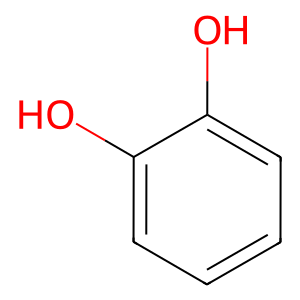

In [30]:
second_mol_obj

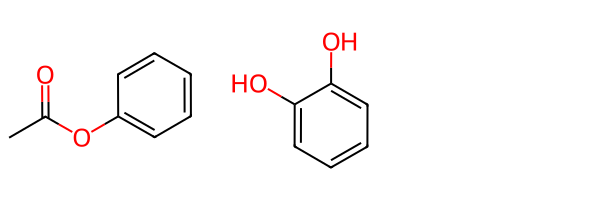

In [32]:
Draw.MolsToGridImage([first_mol_obj,second_mol_obj])

In [ ]:
#or generate your own mol objects

In [35]:
first_fp = Chem.RDKFingerprint(first_mol_obj,maxPath=7,fpSize=512)
second_fp = Chem.RDKFingerprint(second_mol_obj,maxPath=7,fpSize=512)

In [36]:
first_fp

In [37]:
first_fp.ToBitString()

'01100000001000000000000000000010000001000000100001111000010010000000010100000000000010010100000010000001000000000001000000000000010010011010100011100100010000010110000000110000000001000000000011100000000001001011001100010000000100000000110010100000100000100000010100000001000000001010100000001010010001000000000001010010100001000010000001010000001100000100000010001010000100001000000010000010000100000000000101000010110000000001000010100110101100010000000100000100000001010000011101110000000000000000011001000000'

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'that_fp')

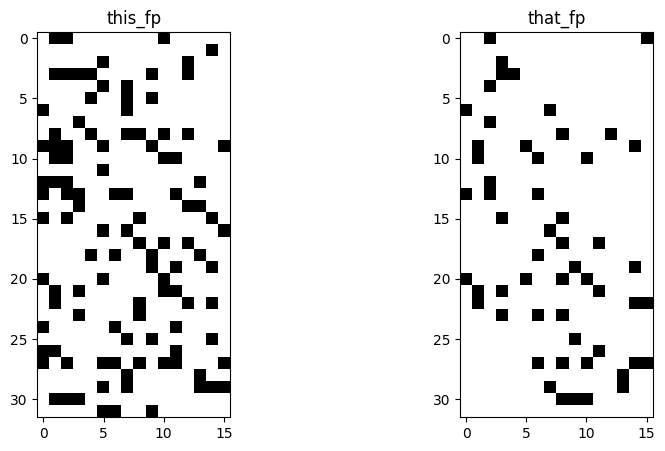

In [40]:
this_fp_array = np.array([int(bit) for bit in first_fp.ToBitString()])
that_fp_array = np.array([int(bit) for bit in second_fp.ToBitString()])

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(this_fp_array.reshape(32,16), cmap='binary')
plt.title('this_fp')

plt.subplot(1, 2, 2)
plt.imshow(that_fp_array.reshape(32,16), cmap='binary')
plt.title('that_fp')

In [45]:
# Morgan FP
MFP_this = AllChem.GetMorganFingerprint(first_mol_obj,2)
MFP_this

In [46]:
MFP_this_bits = AllChem.GetMorganFingerprintAsBitVect(first_mol_obj,5,nBits=512)
MFP_this_bits

In [47]:
DataStructs.DiceSimilarity(first_fp,first_fp)

1.0

In [48]:
DataStructs.DiceSimilarity(first_fp,second_fp)

0.48484848484848486

In [49]:
DataStructs.DiceSimilarity(first_fp,MFP_this_bits)

0.12030075187969924

##Tanimoto Similarity

In [51]:
from rdkit import DataStructs
# Tanimoto
commonBits = first_fp&second_fp
print('first:',first_fp.GetNumOnBits(),'second:',second_fp.GetNumOnBits(),'num in common:',commonBits.GetNumOnBits())
print(commonBits.GetNumOnBits()/(first_fp.GetNumOnBits()+second_fp.GetNumOnBits()-commonBits.GetNumOnBits()))
print('Tanimoto:', DataStructs.TanimotoSimilarity(first_fp,second_fp))

first: 110 second: 55 num in common: 40
0.32
Tanimoto: 0.32


In [52]:
from sklearn.metrics import jaccard_score

In [53]:
jaccard_score(np.array(first_fp),np.array(second_fp))

0.32

## Molecular similarity visualization


In [54]:
from rdkit.Chem.Draw import SimilarityMaps

In [69]:
mola = Chem.MolFromSmiles("O1C=C[C@H]([C@H]1O2)c3c2cc(OC)c4c3OC(=O)C5=C4CCC(=O)5")

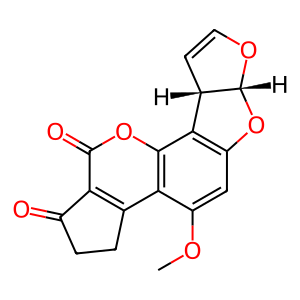

In [70]:
mola

In [67]:
molb = Chem.MolFromSmiles("OCCc1c(C)[n+](cs1)Cc2cnc(C)nc2N")

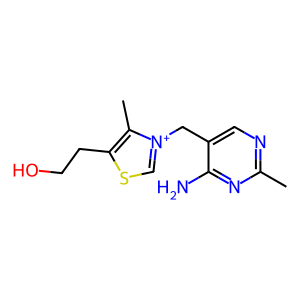

In [68]:
molb

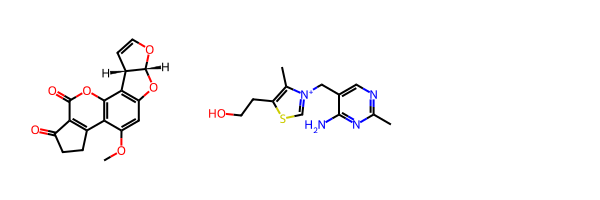

In [71]:
Draw.MolsToGridImage([mola,molb])

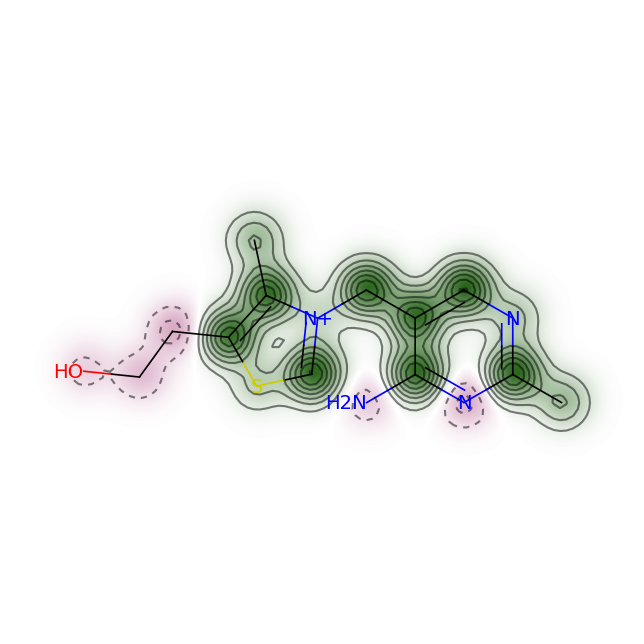

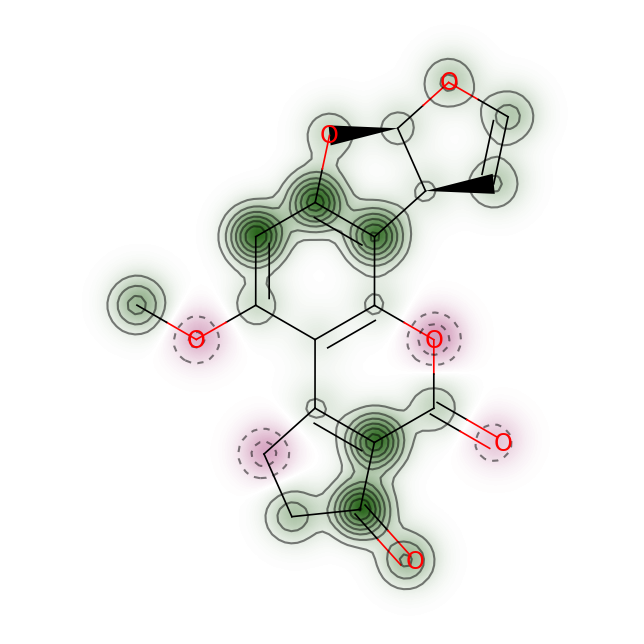

In [72]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mola,molb, SimilarityMaps.GetMorganFingerprint)
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(molb,mola, SimilarityMaps.GetMorganFingerprint)

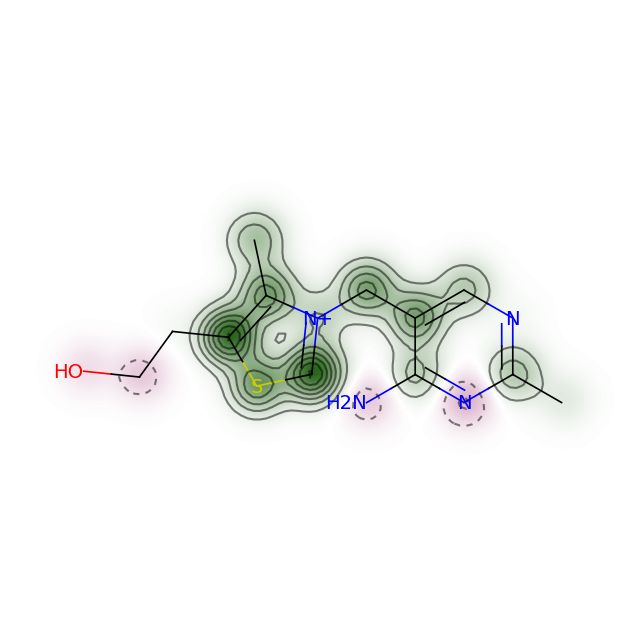

In [75]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(mola, molb,
                                                               lambda m,idx: SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=3, fpType='bv'),
                                                               metric=DataStructs.TanimotoSimilarity)


In [76]:
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import SVG

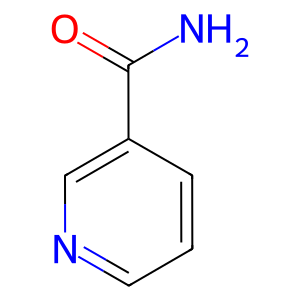

In [77]:
niacinamide = Chem.MolFromSmiles("c1cc(cnc1)C(=O)N")
rdCoordGen.AddCoords(niacinamide)
niacinamide

In [78]:
info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(niacinamide, radius=2, bitInfo=info)

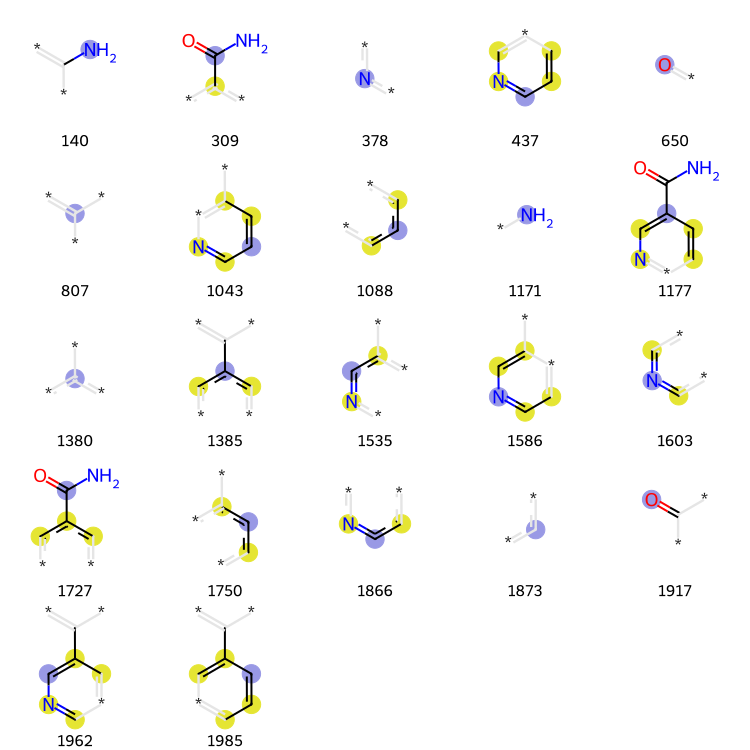

In [79]:
on_bits = [(niacinamide, i, info) for i in fp.GetOnBits()]
labels = [str(i[1]) for i in on_bits]
Draw.DrawMorganBits(on_bits, molsPerRow=5, legends=labels)  # Draw the on bits

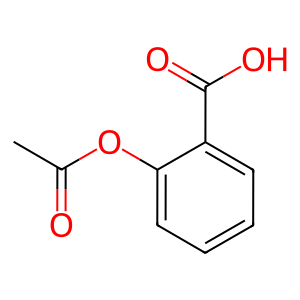

In [80]:
aspirin = AllChem.MolFromSmiles('O=C(C)Oc1ccccc1C(=O)O')
aspirin

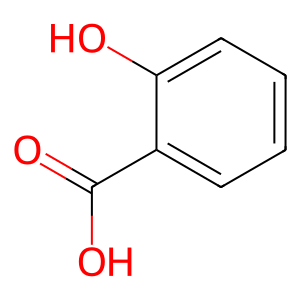

In [81]:
salicylic_acid = AllChem.MolFromSmiles('O=C(O)c1ccccc1O')
salicylic_acid

In [82]:
bit_asp = {}
bit_sal = {}

aspirin_fp = AllChem.GetMorganFingerprintAsBitVect(aspirin, 2, nBits=2048, bitInfo=bit_asp)
salicylic_acid_fp = AllChem.GetMorganFingerprintAsBitVect(salicylic_acid, 2, nBits=2048, bitInfo=bit_sal)

In [83]:
print("Salicylic acid:", sorted(set(salicylic_acid_fp.GetOnBits())))
print("Aspirin", sorted(set(aspirin_fp.GetOnBits())))

Salicylic acid: [389, 456, 650, 807, 1047, 1088, 1199, 1211, 1380, 1447, 1519, 1602, 1607, 1750, 1831, 1873, 1917, 1991]
Aspirin [389, 456, 650, 695, 807, 909, 1017, 1035, 1047, 1057, 1088, 1199, 1380, 1410, 1447, 1468, 1616, 1729, 1750, 1775, 1873, 1917, 1970, 1991]


In [84]:
print("TanimotoSimilarity",DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.TanimotoSimilarity))
print("DiceSimilarity", DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.DiceSimilarity))
print("CosineSimilarity",DataStructs.FingerprintSimilarity(aspirin_fp, salicylic_acid_fp, metric=DataStructs.CosineSimilarity))

TanimotoSimilarity 0.4482758620689655
DiceSimilarity 0.6190476190476191
CosineSimilarity 0.6254627916220946
